In [1]:
import numpy as np
import pandas

In [2]:
df = pandas.read_csv("data.csv", sep="\t")

In [3]:
df.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P7,P8,P9,P10,age,gender,accuracy,country,source,elapsed
0,1,4,2,3,3,2,3,4,4,3,...,1,2,5,2,17,1,92,US,6,914
1,4,3,4,3,4,4,4,4,2,2,...,3,2,2,2,37,1,100,US,1,891
2,3,4,4,4,4,4,4,3,2,2,...,2,3,3,3,31,1,80,US,6,903


In [30]:
qs = df.loc[:, 'A1':'P10']
df = df[qs.min(axis=1)!=0]
qs = qs[qs.min(axis=1)!=0] # Eliminate any non-answers

In [5]:
cov = qs.cov()

In [6]:
_w, _v = np.linalg.eig(cov)

In [108]:
perm = _w.argsort()[::-1]
w = _w[perm]
v = _v.T[perm].T

In [8]:
w_percent = w / w.sum()
w_percent[:5]

array([0.13384628, 0.06084986, 0.0586431 , 0.04416749, 0.03580473])

# 1st Component

In [9]:
qnames = np.array(list(qs))
#print(qnames[v[:,0].argsort()][:5])
#print(qnames[v[:,0].argsort()[::-1]][:5])
perm = np.abs(v[:,0]).argsort()[::-1]
for i in perm[:10]:
    print(qnames[i], v[i,0])

G6 -0.1710307762544171
G4 0.15991784192129826
G7 -0.15731568421652797
G1 0.15287759906599294
G2 0.1469050519030956
C8 -0.14530581459259667
N1 -0.1441015982533742
G5 0.1427224337622645
G9 -0.14161250937591166
K2 -0.14092498177314877


The largest component corresponds most heavily to these questions, with a negative correlation with G6, G7, etc. and a positive correlation with G4, G1, etc.

Looking at these questions (from codebook.html) it's clear this component is extroversion. Interestingly K2 ("I'm hard to get to know") shows up here.

In [63]:
extroversion = v[:,0]

# 2nd Component

In [11]:
qnames = np.array(list(qs))
perm = np.abs(v[:,1]).argsort()[::-1]
for i in perm[:10]:
    print(qnames[i], v[i,1])

E6 0.20597029063302022
C6 0.17248713249472672
P2 0.15388370916998245
P1 0.1499493716309426
E4 0.14950626719267315
K3 -0.14766457914639436
E2 0.14762705710617707
L3 0.1440789512699911
F8 0.14269529743078285
F7 0.13801740245341954


The second component corresponds to a positive correlation with E6 ("I act wild and crazy"), C6 ("I have frequent mood swings"), and P2 ("I get angry easily"). There is only a single negative correlation within the top ten with K3 ("I don't talk a lot"). This top ten also interestingly features L3 ("I am easily hurt") and F8 ("I use swear words").

This is likely neuroticism, which is described as a tendency towards negative emotions.

In [64]:
neuroticism = v[:,1]

# 3rd Component

In [13]:
qnames = np.array(list(qs))
perm = np.abs(v[:,2]).argsort()[::-1]
for i in perm[:10]:
    print(qnames[i], v[i,2])

B9 -0.15844769138772197
M6 -0.15676948152848355
M8 -0.15453372360128262
F4 -0.15152242905694255
H3 0.14540654422003166
F3 -0.14366736488670773
B13 -0.13734204886594867
F7 0.1351027973652484
J5 0.13471010518564172
M10 -0.13457086222536624


The third component corresponds to a negative correlation with B9 ("I consider myself an average person"), M6 ("I avoid philosophical discussions"), M8 ("I am not interested in theoretical discussions"), F4 ("I respect authority") and F3 ("I believe in one true religion"). It has a positive correlation to H3 ("I read a lot") and interestingly F7 ("I break rules") and J5 ("I swim against the current").

This component is likely the opposite of agreeableness, with the side-effect of less agreeable people being interested in philosophical and theoretical discussions.

In [65]:
agreeableness = -v[:,2]

# 4th Component

In [15]:
qnames = np.array(list(qs))
perm = np.abs(v[:,3]).argsort()[::-1]
for i in perm[:10]:
    print(qnames[i], v[i,3])

H3 -0.1913235890706045
H1 -0.18775715951136532
H8 0.17390480567920055
M1 -0.1728577489869305
H5 -0.16264656276420256
A3 -0.15826779096251334
H6 -0.15189973498317477
H2 -0.136395564206311
L6 -0.13573872501601428
P10 -0.13126368720766143


This fourth component has negative correlations to H3 ("I read a lot"), H1 ("I like to read"), M1 ("I believe in the importance of art"), H5 ("I cry during movies"), and A3 ("I feel others' emotions"), along with a positive correlation to H8 ("I do not like poetry").

This component is the opposite of openness, described as imagination and feelings.

In [66]:
openness = -v[:,3]

# 5th Component

In [17]:
qnames = np.array(list(qs))
perm = np.abs(v[:,4]).argsort()[::-1]
for i in perm[:10]:
    print(qnames[i], v[i,4])

O4 0.19886019586754983
O7 -0.1972595863771573
O6 -0.19484257306190908
O8 -0.18947714203430108
O2 0.18536951186932799
O3 0.1798213532495291
D1 0.17607751440675248
D2 0.17075678421086615
D5 0.1691971451913424
O1 0.1691548368791817


This component correlates with O4 ("I continue until everything is perfect") and O2 ("I get chores done right away"), and has a negative correlation with O7 ("I am not bothered by disorder"), O6 ("I am not bothered by messy people"), and O8 ("I leave a mess in my room").

This component very clearly has to do with order, and so fits well with conscientiousness, described as hardworking, dependable, and organized.

In [67]:
conscientiousness = v[:,4]

# Feature Vector

In [68]:
feat = np.array([extroversion, neuroticism, agreeableness, openness, conscientiousness])

In [69]:
features = pandas.DataFrame(np.dot(feat, qs.T).T, 
                            columns=['extroversion', 'neuroticism', 'agreeableness', 'openness', 'conscientiousness'])
features['gender'] = df.reset_index()['gender']
features

,extroversion,neuroticism,agreeableness,openness,conscientiousness,gender
0,-5.810965,17.387918,-6.584212,8.200761,12.721462,1
1,-5.335986,14.908187,-3.375977,9.735851,13.009838,1
2,-4.347866,15.803447,-3.161133,9.738800,6.819883,1
3,-0.559511,16.279643,-2.909878,9.519738,10.771242,2
4,-3.053900,12.140540,-0.499046,13.640653,13.020681,1
...,...,...,...,...,...,...
35376,-4.208740,14.418803,0.621966,12.906550,8.599221,2
35377,1.506883,13.596393,-4.003664,12.188320,15.005906,2
35378,-1.044123,4.227533,0.771741,1.526349,3.157865,1
35379,-2.096298,10.330194,1.724378,10.238960,11.458184,2


In [70]:
features.describe()

,extroversion,neuroticism,agreeableness,openness,conscientiousness,gender
count,35381.000000,35381.000000,35381.000000,35381.000000,35381.000000,35381.000000
mean,-1.457474,13.683084,-0.874055,8.861748,11.308302,1.604816
std,5.121733,3.453374,3.390176,2.942152,2.649012,0.508952
min,-20.431932,-6.147395,-16.080931,-8.018629,-0.112546,0.000000
25%,-4.852449,11.349467,-3.016739,7.034918,9.591913,1.000000
50%,-1.272340,13.621938,-0.626365,8.914878,11.298162,2.000000
75%,2.146226,15.924529,1.523212,10.813196,12.976326,2.000000
max,16.205577,28.165765,11.773559,20.292218,23.093379,3.000000


In [71]:
features[features['gender'] == 1].describe() # male

,extroversion,neuroticism,agreeableness,openness,conscientiousness,gender
count,13856.000000,13856.000000,13856.000000,13856.000000,13856.000000,13856.0
mean,-1.088094,13.138299,-1.709847,8.018905,11.092042,1.0
std,5.243066,3.494439,3.397955,2.920588,2.628629,0.0
min,-20.431932,-6.147395,-16.080931,-8.018629,-0.058420,1.0
25%,-4.573392,10.806991,-3.867685,6.257138,9.412942,1.0
50%,-0.906123,13.077194,-1.422303,8.094658,11.117498,1.0
75%,2.575945,15.378169,0.722540,9.919788,12.737638,1.0
max,15.676430,28.165765,11.773559,20.292218,23.093379,1.0


In [72]:
features[features['gender'] == 2].describe() # female

,extroversion,neuroticism,agreeableness,openness,conscientiousness,gender
count,21171.000000,21171.000000,21171.000000,21171.000000,21171.000000,21171.0
mean,-1.658066,14.033483,-0.309599,9.406477,11.455182,2.0
std,5.009287,3.379001,3.260637,2.821091,2.649965,0.0
min,-20.071106,-0.525588,-14.932630,-4.854296,-0.112546,2.0
25%,-4.962742,11.747686,-2.358306,7.621714,9.728392,2.0
50%,-1.465694,13.971743,-0.084048,9.458005,11.435966,2.0
75%,1.897796,16.224033,1.978201,11.277730,13.113404,2.0
max,16.205577,27.437295,11.262948,19.650598,22.799967,2.0


In [73]:
gender_diff = ((features[features['gender'] == 2].mean() - features[features['gender'] == 1].mean()) / features.std())[:5]
gender_diff

extroversion        -0.111285
neuroticism          0.259220
agreeableness        0.413031
openness             0.471618
conscientiousness    0.137085
dtype: float64

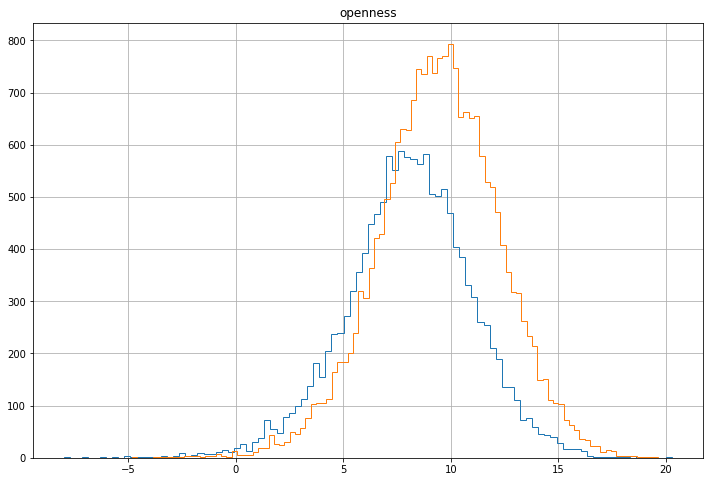

In [102]:
ax = features[features['gender'] == 1].hist(column="openness", bins=100, histtype='step', figsize=(12,8))
ax = features[features['gender'] == 2].hist(column="openness", ax=ax, bins=100, histtype='step')